In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots # Подключаем нужные библиотеки

In [48]:
sample = np.sort(np.random.exponential(scale = 1, size = 25)) # Генерация выборки

In [127]:
def count_mode(sample): # Функция подсчёта моды выборки
    count = {} 
    for i in sample:
        if i not in count:
            count[i] = 0
        count[i]+=1
    max_count = np.max(list(count.values()))
    mode = []
    for i in count:
        if count[i] == max_count:
            mode.append(i)
    return mode

In [128]:
def central_moment(sample, k): # Функция подсчёта центрального момента
    moment = np.sum(sample**k)/len(sample)
    return np.sum((sample - moment)**k)/len(sample)

In [129]:
def asimmetry_coefficient(sample): #Функция подсчёта коэффициента асимметрии
    return central_moment(sample, 3)/(central_moment(sample, 2) ** (3/2))

In [130]:
print("Мода: ", count_mode(sample))
print("Медиана: ", np.median(sample))
print("Размах: ", np.max(sample) - np.min(sample))
print("Коэффициент ассиметрии: ", asimmetry_coefficient(sample))

Мода:  [0.003228926649515704, 0.03115582985001746, 0.06978317362791907, 0.3085865335885874, 0.3676675274684612, 0.37106931515217645, 0.3899879036173129, 0.4853965396720894, 0.6853659257301593, 0.7161057248589938, 0.8554872050279894, 0.952145699993091, 1.1494600466422928, 1.2999434129703136, 1.3210170767503548, 1.4770898558359389, 1.6390605491097656, 1.8204844594825789, 1.8737510422858754, 1.9784673990553276, 2.018088688781927, 2.3163311500624646, 2.535014533119679, 3.4466675973386365, 3.684465169666096]
Медиана:  1.1494600466422928
Размах:  3.6812362430165804
Коэффициент ассиметрии:  -35.86372800004614


In [131]:
fig = go.Figure() # Эмпирическая функция распределения
fig.add_trace(go.Scatter(x=sample, y=np.arange(1, 26)/len(sample), name = "Оценка"))
fig.add_trace(go.Scatter(x=sample, y= 1 - np.exp(-sample), name = "Настоящая функция"))

In [132]:
x, y = np.histogram(sample)

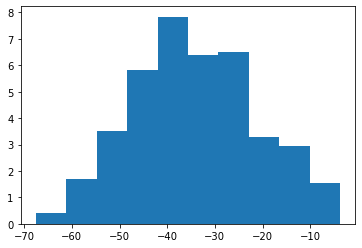

In [147]:
plt.hist(y[:-1], y, weights=x/len(sample)) # Гистограмма
plt.show()

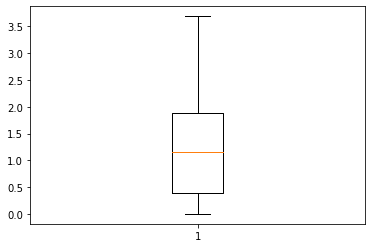

In [146]:
plt.boxplot(sample) # Boxplot
plt.show()

In [135]:
def core(y): # Ядро
    return [(3/4)*(1 - i**2) if abs(i) < 1 else 0 for i in y]

In [136]:
def core_aproximation(z, sample): # Ядерная оценка плотности
    s = ((1/(len(sample) - 1))*np.sum((sample - np.mean(sample))**2))**(1/2)
    h = 2.344*(s/(len(sample) ** (1/5)))
    return 1/(h*len(sample)) * np.sum(core((z - sample)/h))

In [137]:
fig = go.Figure() # Ядерная оценка плотности распределения
fig.add_trace(go.Scatter(x=sample, y= [core_aproximation(i, sample) for i in sample], name = "Оценка"))
fig.add_trace(go.Scatter(x=sample, y= np.exp(-sample), name = "Настоящая плотность"))

In [138]:
def bootstrap(sample, function): #реализация метода bootstrap
    function_samples = []
    for i in range(1000):
        new_sample = np.random.choice(sample, len(sample))
        function_samples.append(function(new_sample))
    return np.sort(function_samples)

In [139]:
x, y = np.histogram(bootstrap(sample, np.mean))

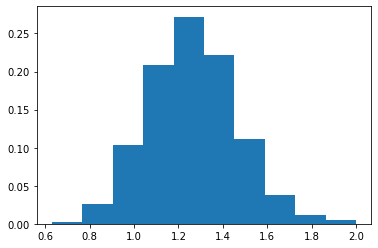

In [140]:
plt.hist(y[:-1], y, weights=x/1000) #бутстреповская оценка плотности распределения среднего арифметического выборки
plt.show()

In [144]:
x, y = np.histogram(bootstrap(sample, asimmetry_coefficient))

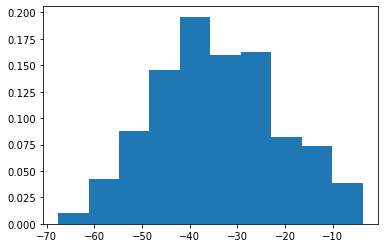

In [145]:
plt.hist(y[:-1], y, weights=x/1000) #бутстреповская оценка плотности распределения коэффициента асимметрии
plt.show()